1. Introduction
This assignment will help you to consolidate the concepts learnt in the
session.

2. Problem Statement
I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

Description of Variables

The dataset contains 6366 observations of 9 variables:

rate_marriage: woman's rating of her marriage (1 = very poor, 5 =very good)


age: woman's age


yrs_married: number of years married


children: number of children


religious: woman's rating of how religious she is (1 = not religious, 4 =strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 =

some college, 16 = college graduate, 17 = some graduate school, 20= advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semiskilled/unskilled, 3 = "white collar", 4 =

teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)


occupation_husb: husband's occupation (same coding as above)


affairs: time spent in extra-marital affairs


Code to loading data and modules:

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 

In [2]:
dta =sm.datasets.fair.load_pandas().data

In [3]:
dta.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
2656,5.0,22.0,2.5,0.0,1.0,20.0,4.0,5.0,0.0
2627,5.0,27.0,2.5,1.0,3.0,16.0,4.0,5.0,0.0
3205,4.0,27.0,2.5,1.0,3.0,12.0,3.0,2.0,0.0
5614,4.0,22.0,2.5,0.0,2.0,14.0,3.0,5.0,0.0
2120,5.0,27.0,9.0,3.0,4.0,16.0,4.0,5.0,0.0


In [4]:
dta['affair'] = (dta.affairs >0).astype(int)


In [5]:
dta.sample(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
5851,3.0,27.0,6.0,0.0,2.0,20.0,4.0,4.0,0.000000,0
1726,3.0,27.0,9.0,0.0,3.0,16.0,5.0,5.0,1.333333,1
1947,5.0,42.0,23.0,4.0,4.0,14.0,3.0,2.0,0.152174,1
331,5.0,42.0,23.0,2.0,3.0,14.0,5.0,6.0,1.217391,1
99,4.0,27.0,2.5,1.0,2.0,12.0,5.0,2.0,4.900000,1


In [6]:
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")


In [7]:
X.sample(5)

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
4758,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,4.0,14.0
4424,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,32.0,13.0,1.0,2.0,14.0
5890,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,22.0,0.5,0.0,2.0,14.0
2755,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,22.0,0.5,0.0,4.0,12.0
2972,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,22.0,2.5,0.0,1.0,12.0


In [8]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})


In [9]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [10]:
y = np.ravel(y)

<center><h3>Data wrangling</h3></center>
 <li>Identify and handle missing values
        <ul>
            <li>Identify missing values</li>
            <li>Deal with missing values</li>
            <li>Correct data format</li>
        </ul>
    </li>
    <li>Data standardization</li>
    <li>Data Normalization (centering/scaling)</li>
    <li>Binning</li>
    <li>Indicator variable</li>


### What is the purpose of Data Wrangling?

Data Wrangling is the process of converting data from inital format to format that may be better for analysis

In [12]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


### Identify and handle missing values

In [13]:
dta.isna().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

As we have found that we don't have any missing values so we are good to proceed towards next step.

### Data type validation

In [58]:
dta.dtypes

rate_marriage      float64
age                float64
yrs_married        float64
children           float64
religious          float64
educ               float64
occupation         float64
occupation_husb    float64
affairs            float64
affair               int32
dtype: object

It seems that we don't have any issues with datatype of column of dataframe

In [59]:
import seaborn as sns

In [60]:
# Data Standardization


In [61]:
scale=StandardScaler()

In [62]:
X_scaled=scale.fit_transform(X)

In [63]:
columns=list(X.columns)

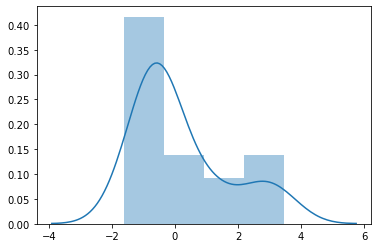

In [64]:
sns.distplot(X_scaled[columns.index("age")])

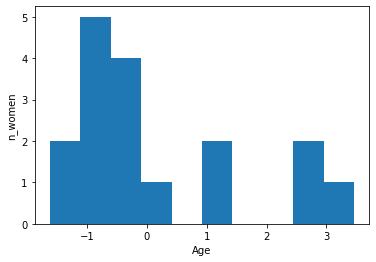

In [65]:

plt.hist(X_scaled[columns.index("age")],bins=10)
plt.xlabel("Age")
plt.ylabel("n_women")
plt.show()

In [66]:
list(dta.columns)

['rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occupation',
 'occupation_husb',
 'affairs',
 'affair']

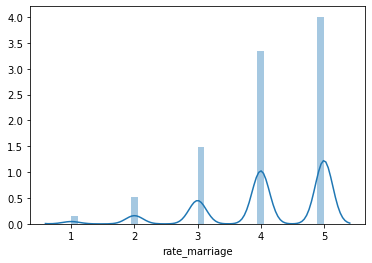

In [67]:
#without scaling
sns.distplot(X['rate_marriage'])
plt.show()

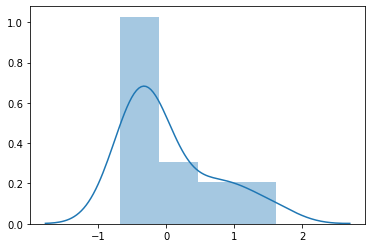

In [68]:
sns.distplot(X_scaled[columns.index("rate_marriage")])

 We will perform univariate analysis using seaborn without scaling

C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\dis

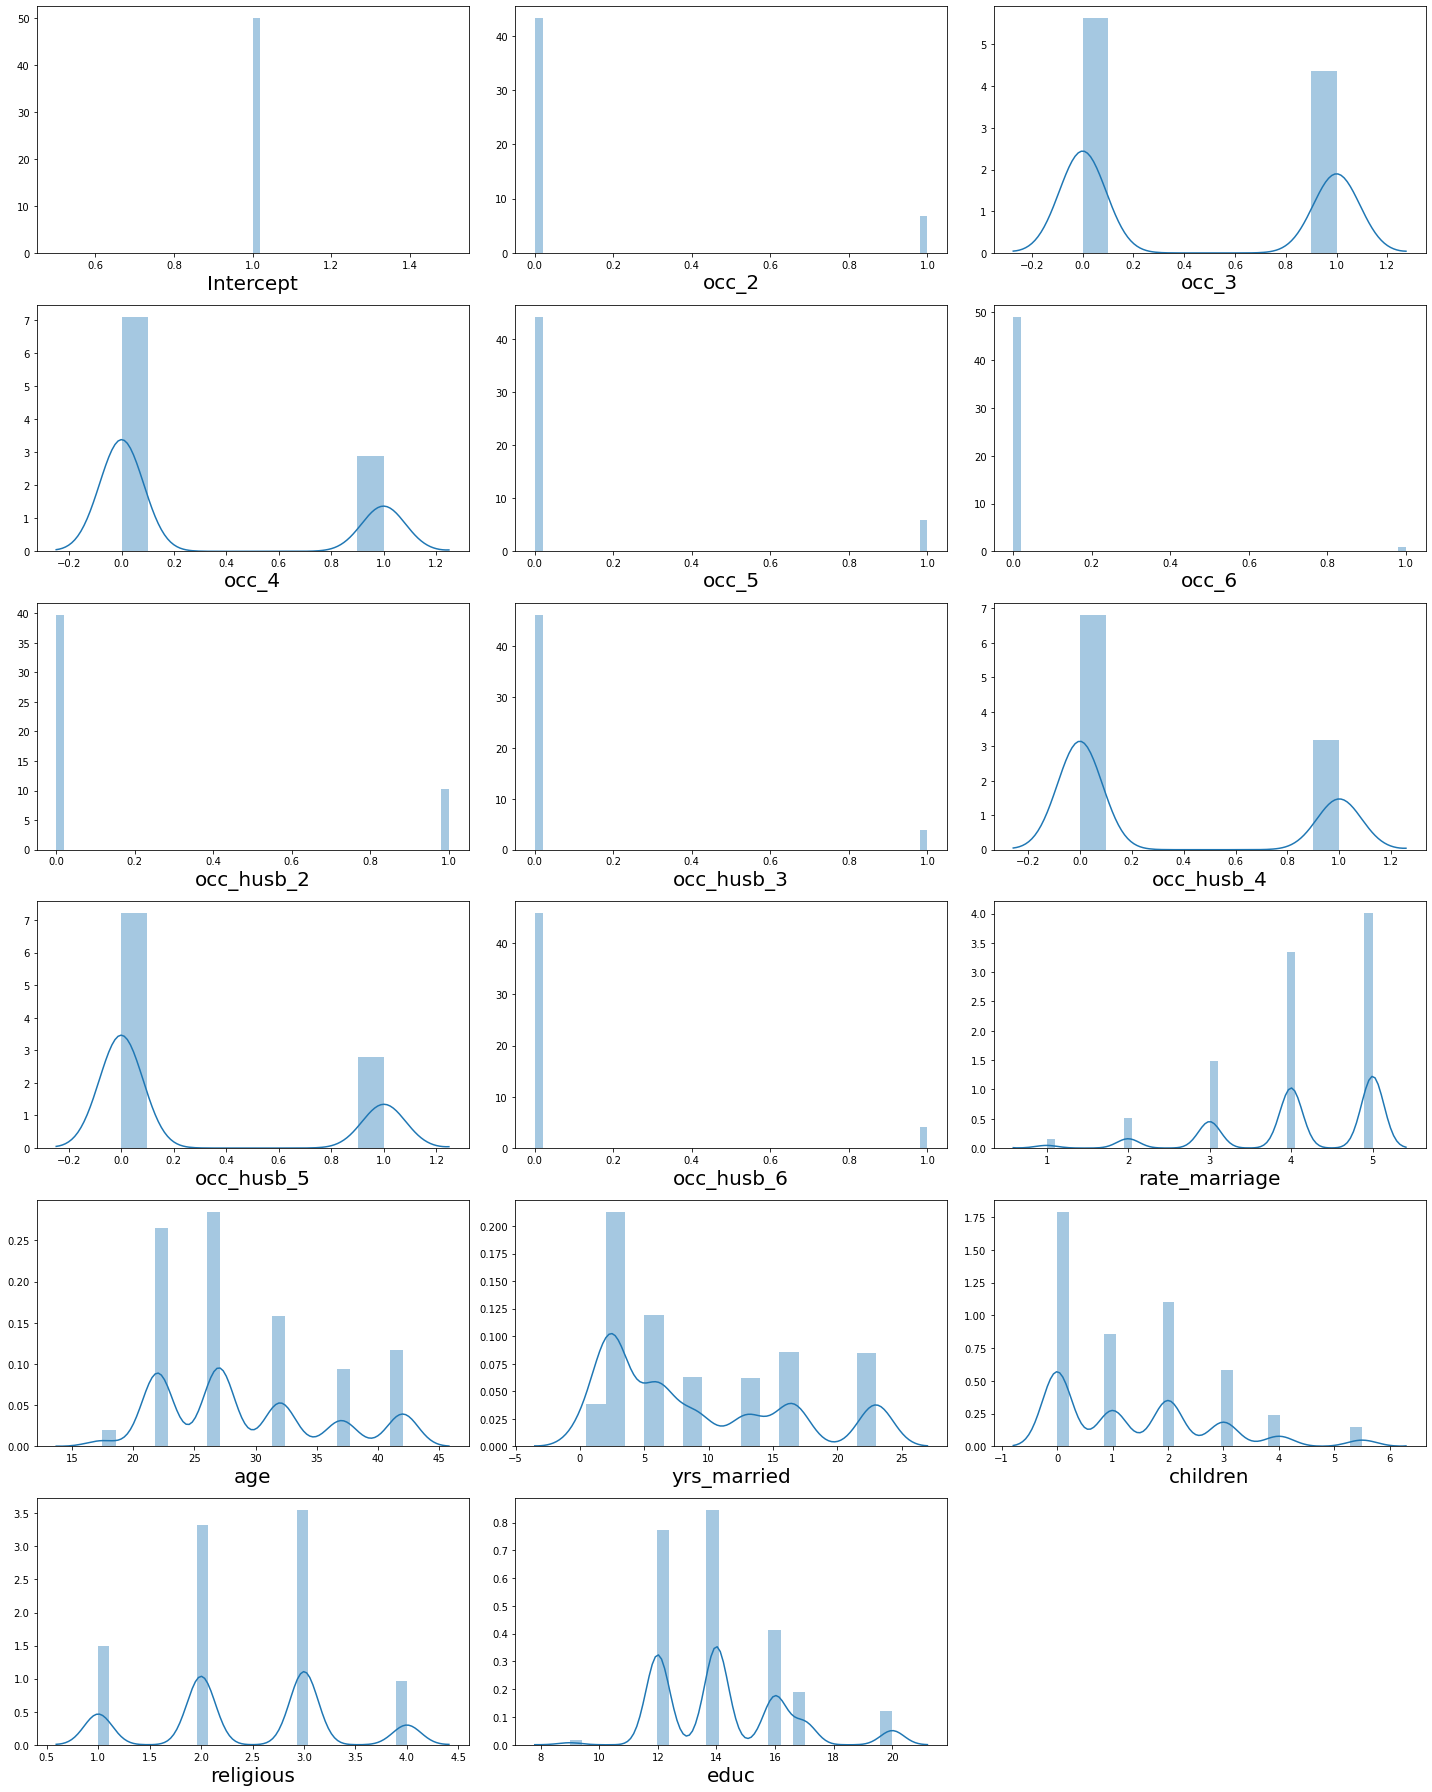

In [69]:
plt.figure(figsize=(20,25))
grid=1
for col in X:
    if grid<=17:
        plt.subplot(6,3,grid)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
        grid+=1
plt.tight_layout()

Dataset after Standard Scaler operation

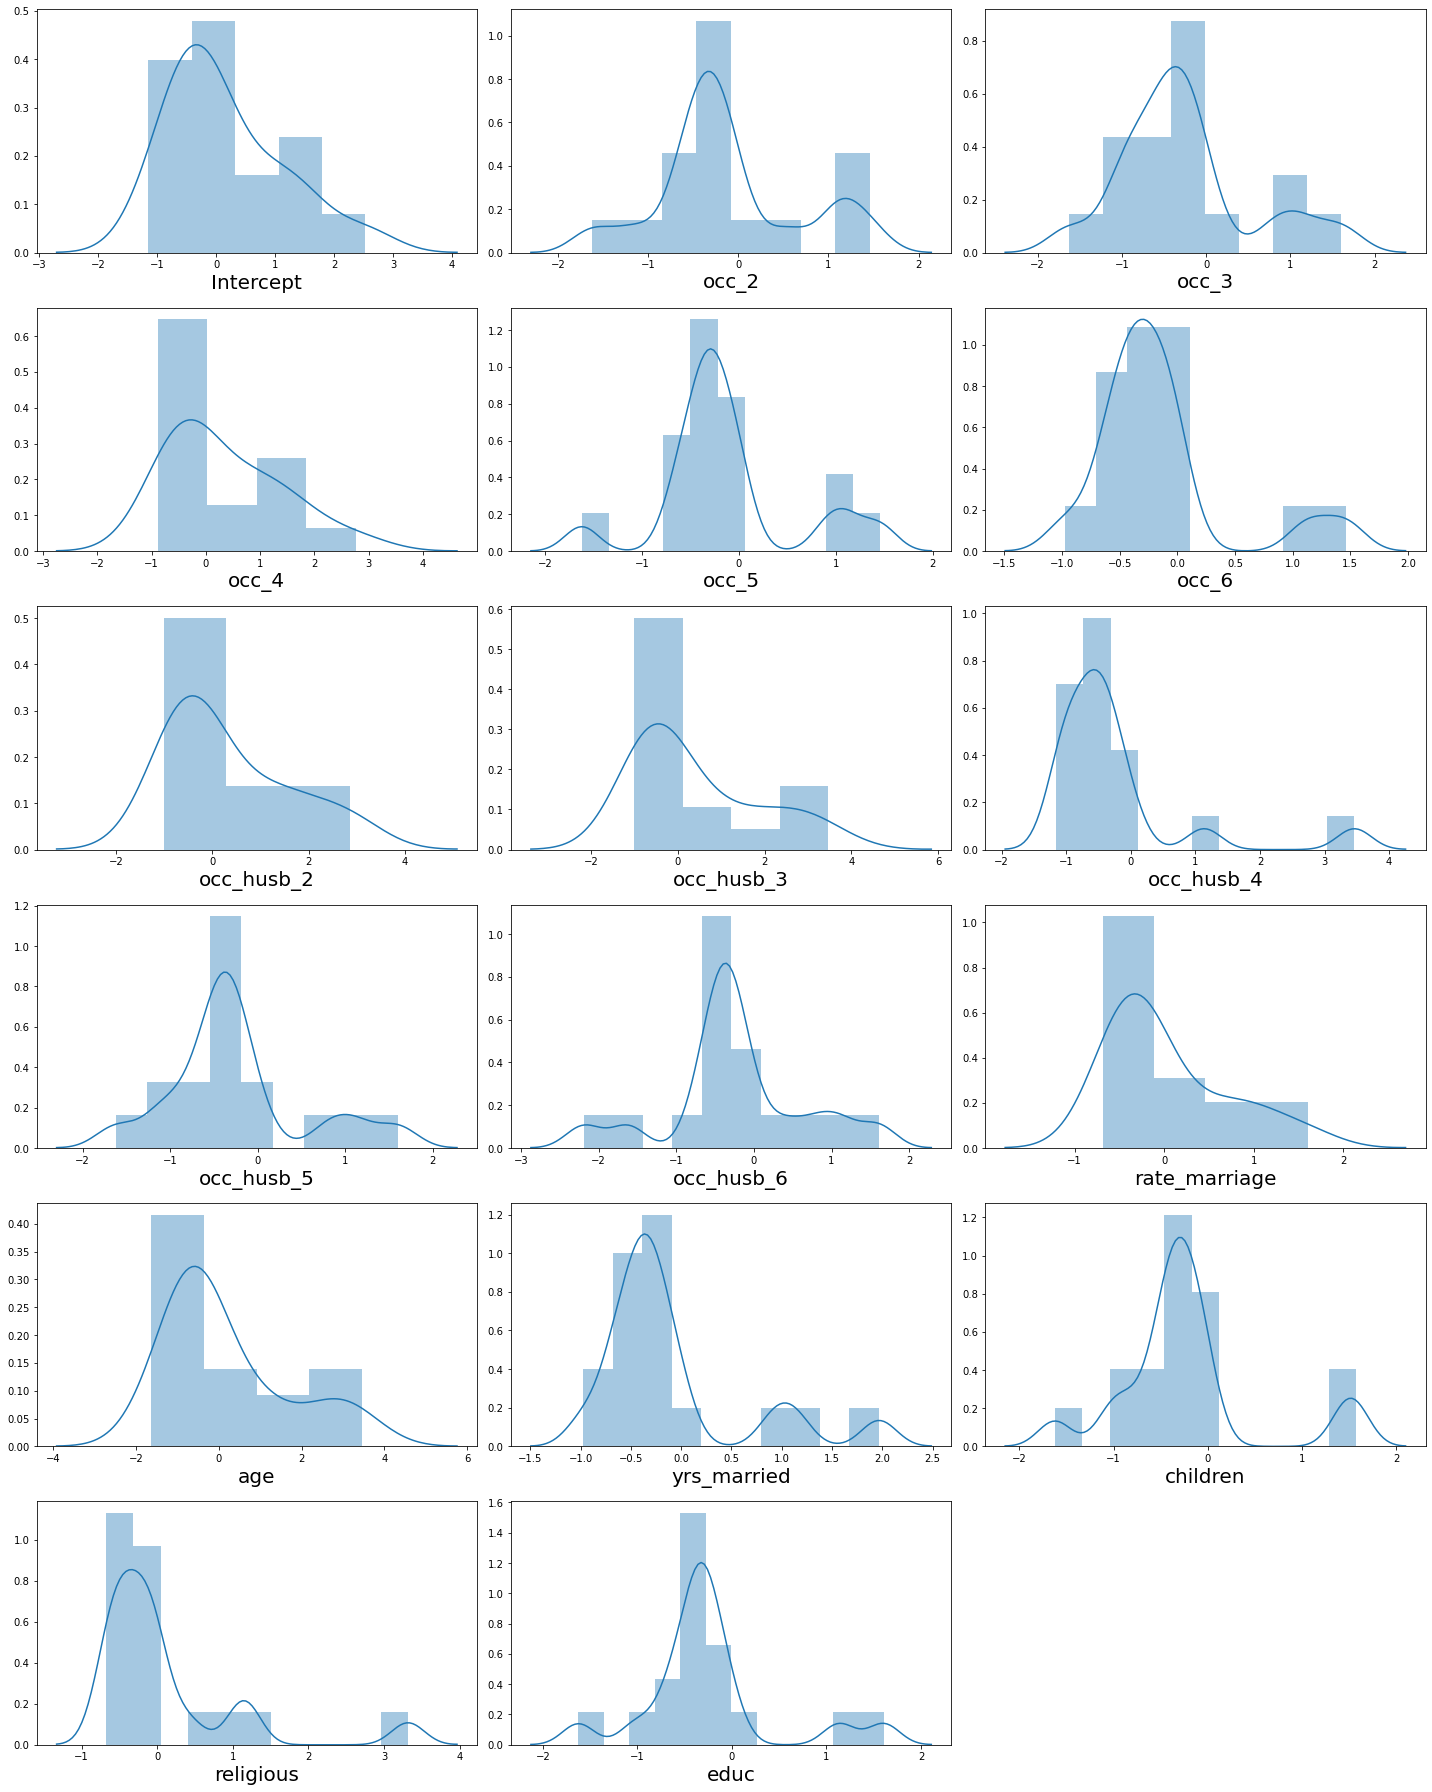

In [70]:
plt.figure(figsize=(20,25))
grid=1
for col in X:
    if grid<=17:
        plt.subplot(6,3,grid)
        sns.distplot(X_scaled[columns.index(col)])
        plt.xlabel(col,fontsize=20)
        grid+=1
plt.tight_layout()

<center><h3>(EDA )</h3></center>

In this section we will explore methods to see whether we can use features to predict whether women having affair  or not.

Here is brief idea what we will perform

1. Analyzing individual  features pattern using visualization
2. Descriptive Statistical Analysis
3. Basics of grouping
4. Correlation and causation
5. ANOVA

### describe Dataframe

In [71]:
X.describe(include="all")

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
count,6366.0,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,1.0,0.134936,0.437166,0.288093,0.116243,0.017122,0.205467,0.076971,0.318882,0.279453,0.083255,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865
std,0.0,0.341682,0.496075,0.452910,0.320541,0.129737,0.404074,0.266567,0.466080,0.448766,0.276289,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000
75%,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000


 ### Analyzing Individual Feature Petterns using Visualization

Columns:
<h3>
'rate_marriage',
 'age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'occupation',
 'occupation_husb',
 'affairs',
 'affair'
</h3>

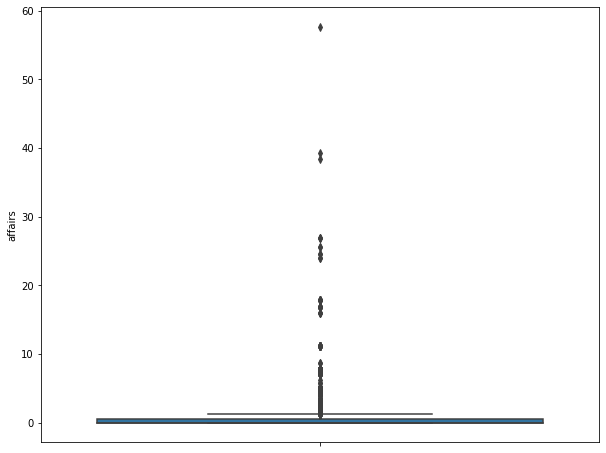

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(dta['affairs'],orient="vertical")

In [126]:
dta_eda=dta.copy()

In [ ]:
dta['affair']

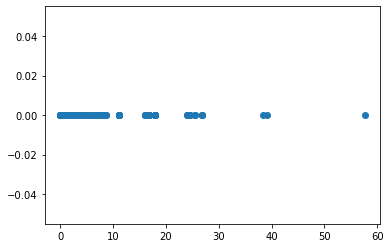

In [95]:
plt.plot(dta['affairs'],np.zeros_like(dta['affairs']),'o',hu)

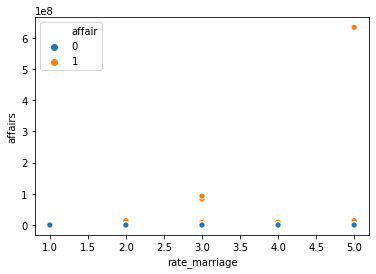

In [94]:
sns.scatterplot(X['rate_marriage'],dta['affairs']**5,hue=dta["affair"])

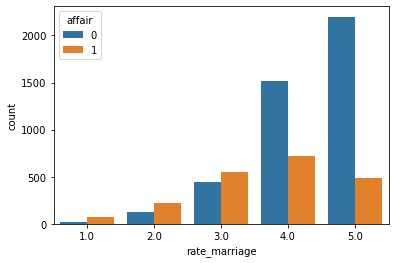

In [142]:
sns.countplot(X['rate_marriage'],hue=dta['affair'])
plt.show()

 If we observe graph rate marriage we can see that women having rating 3 or less usually more than average women has affair

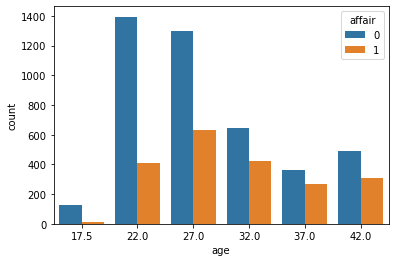

In [145]:
sns.countplot(X['age'],hue=dta['affair'])
plt.show()

In [26]:
import seaborn as sns

In [27]:
from pandas.plotting  import scatter_matrix

In [35]:
X.shape

(6366, 17)

C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\AvnishYadav\anaconda3\lib\site-packages\seaborn\dis

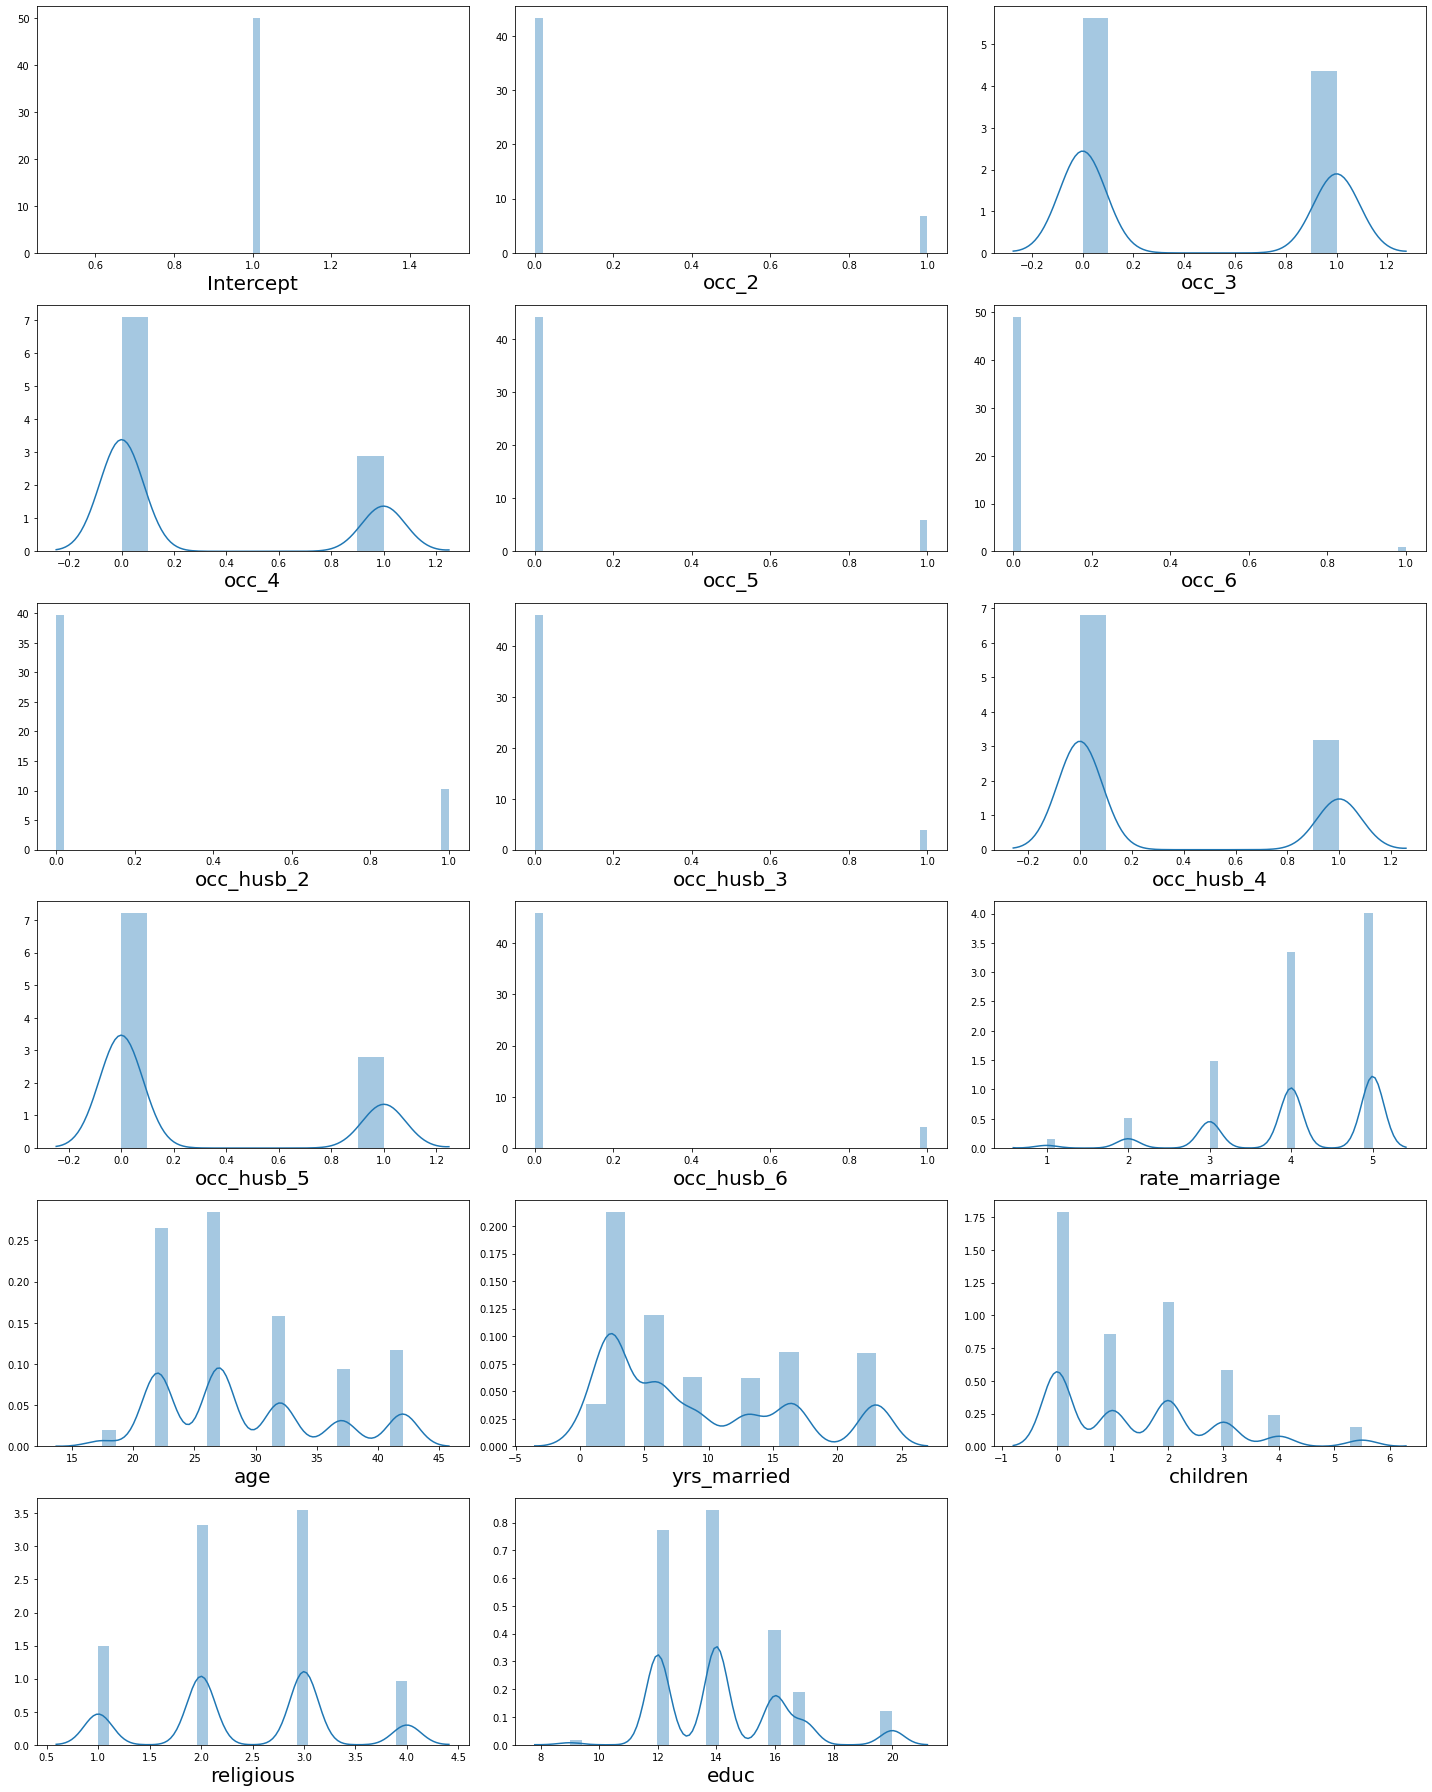

In [43]:
plt.figure(figsize=(20,25))
grid=1
for col in X:
    if grid<=17:
        plt.subplot(6,3,grid)
        sns.distplot(X[col])
        plt.xlabel(col,fontsize=20)
        grid+=1
plt.tight_layout()

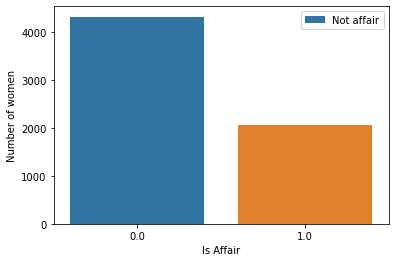

In [49]:
sns.countplot(y)
plt.xlabel("Is Affair")
plt.ylabel("Number of women")
plt.legend(["Not affair","affair"])

In [55]:
affaire_prop=np.unique(y,return_counts=True)[1]
label=["No affair","affair"]

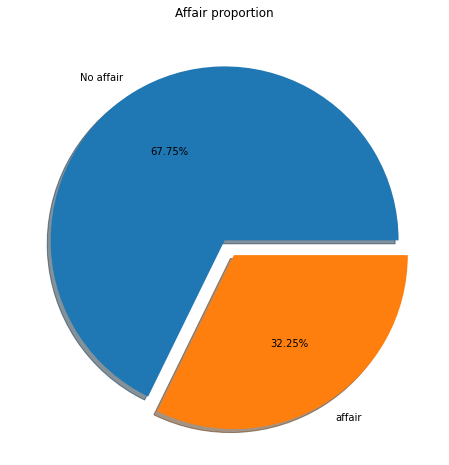

In [68]:

#check the proportion affair
plt.figure(figsize=(10,8))
plt.title("Affair proportion")
plt.pie(affaire_prop,explode=[0,0.1],labels=label,autopct='%.2f%%',shadow=True,)
plt.show()

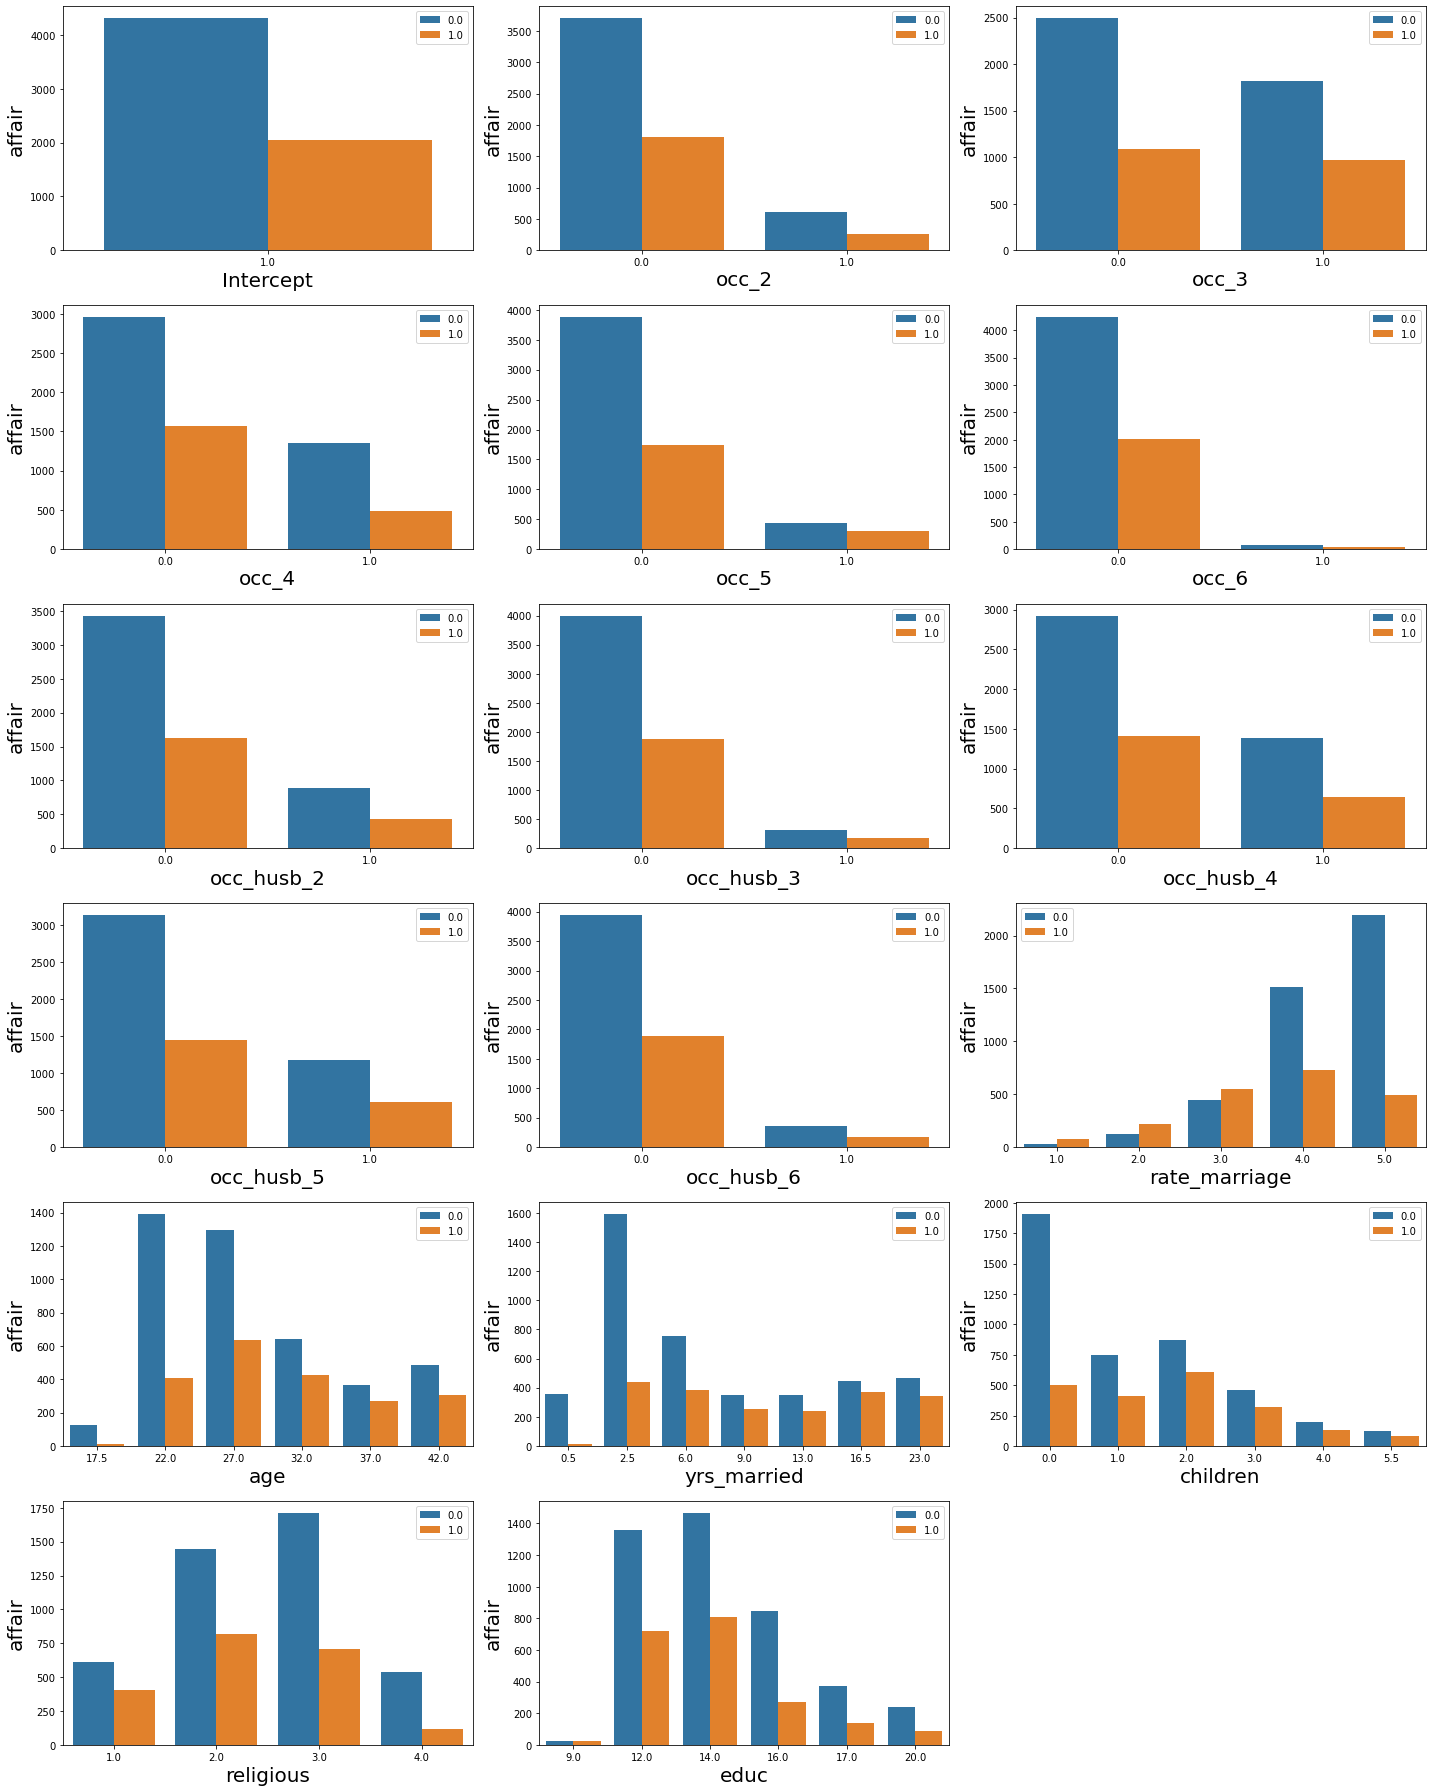

In [74]:
# bivariate analysis
plt.figure(figsize=(20,25))
grid=1
for col in X:
    if grid<=17:
        plt.subplot(6,3,grid)
        sns.countplot(X[col],hue=y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel("affair",fontsize=20)
        grid+=1
plt.tight_layout()


### Correlation and Causation

Correlation: A measure of extent of interdependence between variables.

Causation: the relation between cause and effect between two variables.

It is important to know the difference between cause and effect between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may required indendent experimenatation.



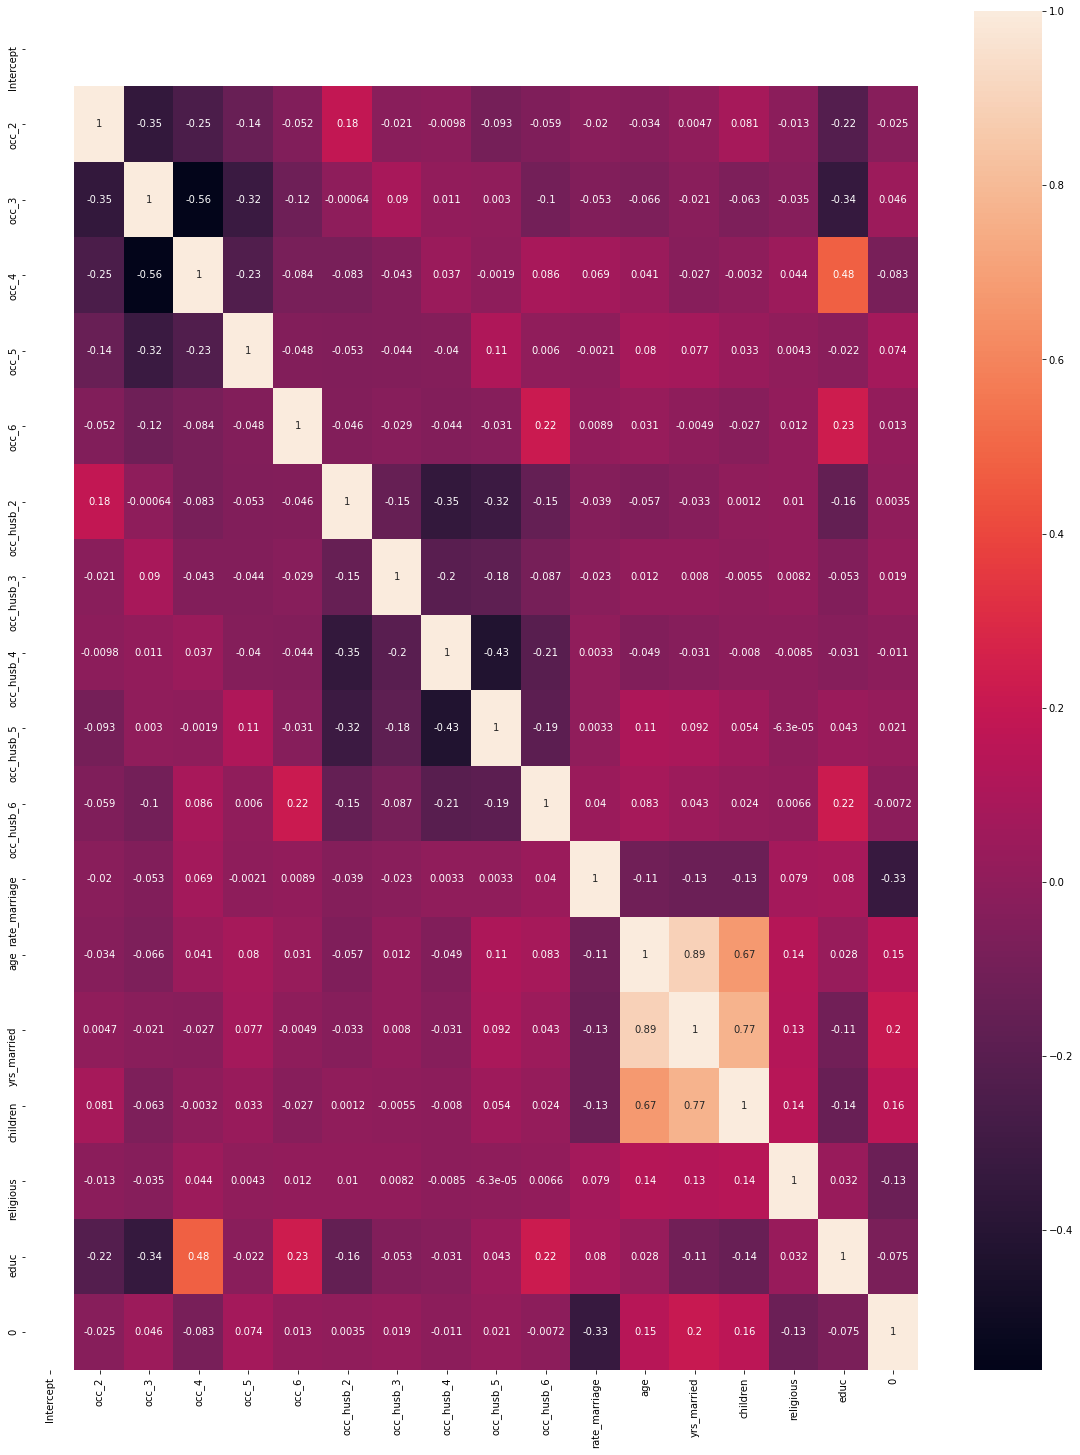

In [147]:
plt.figure(figsize=(20,25))
sns.heatmap(X.join(pd.DataFrame(y)).corr(),annot=True)
plt.show()

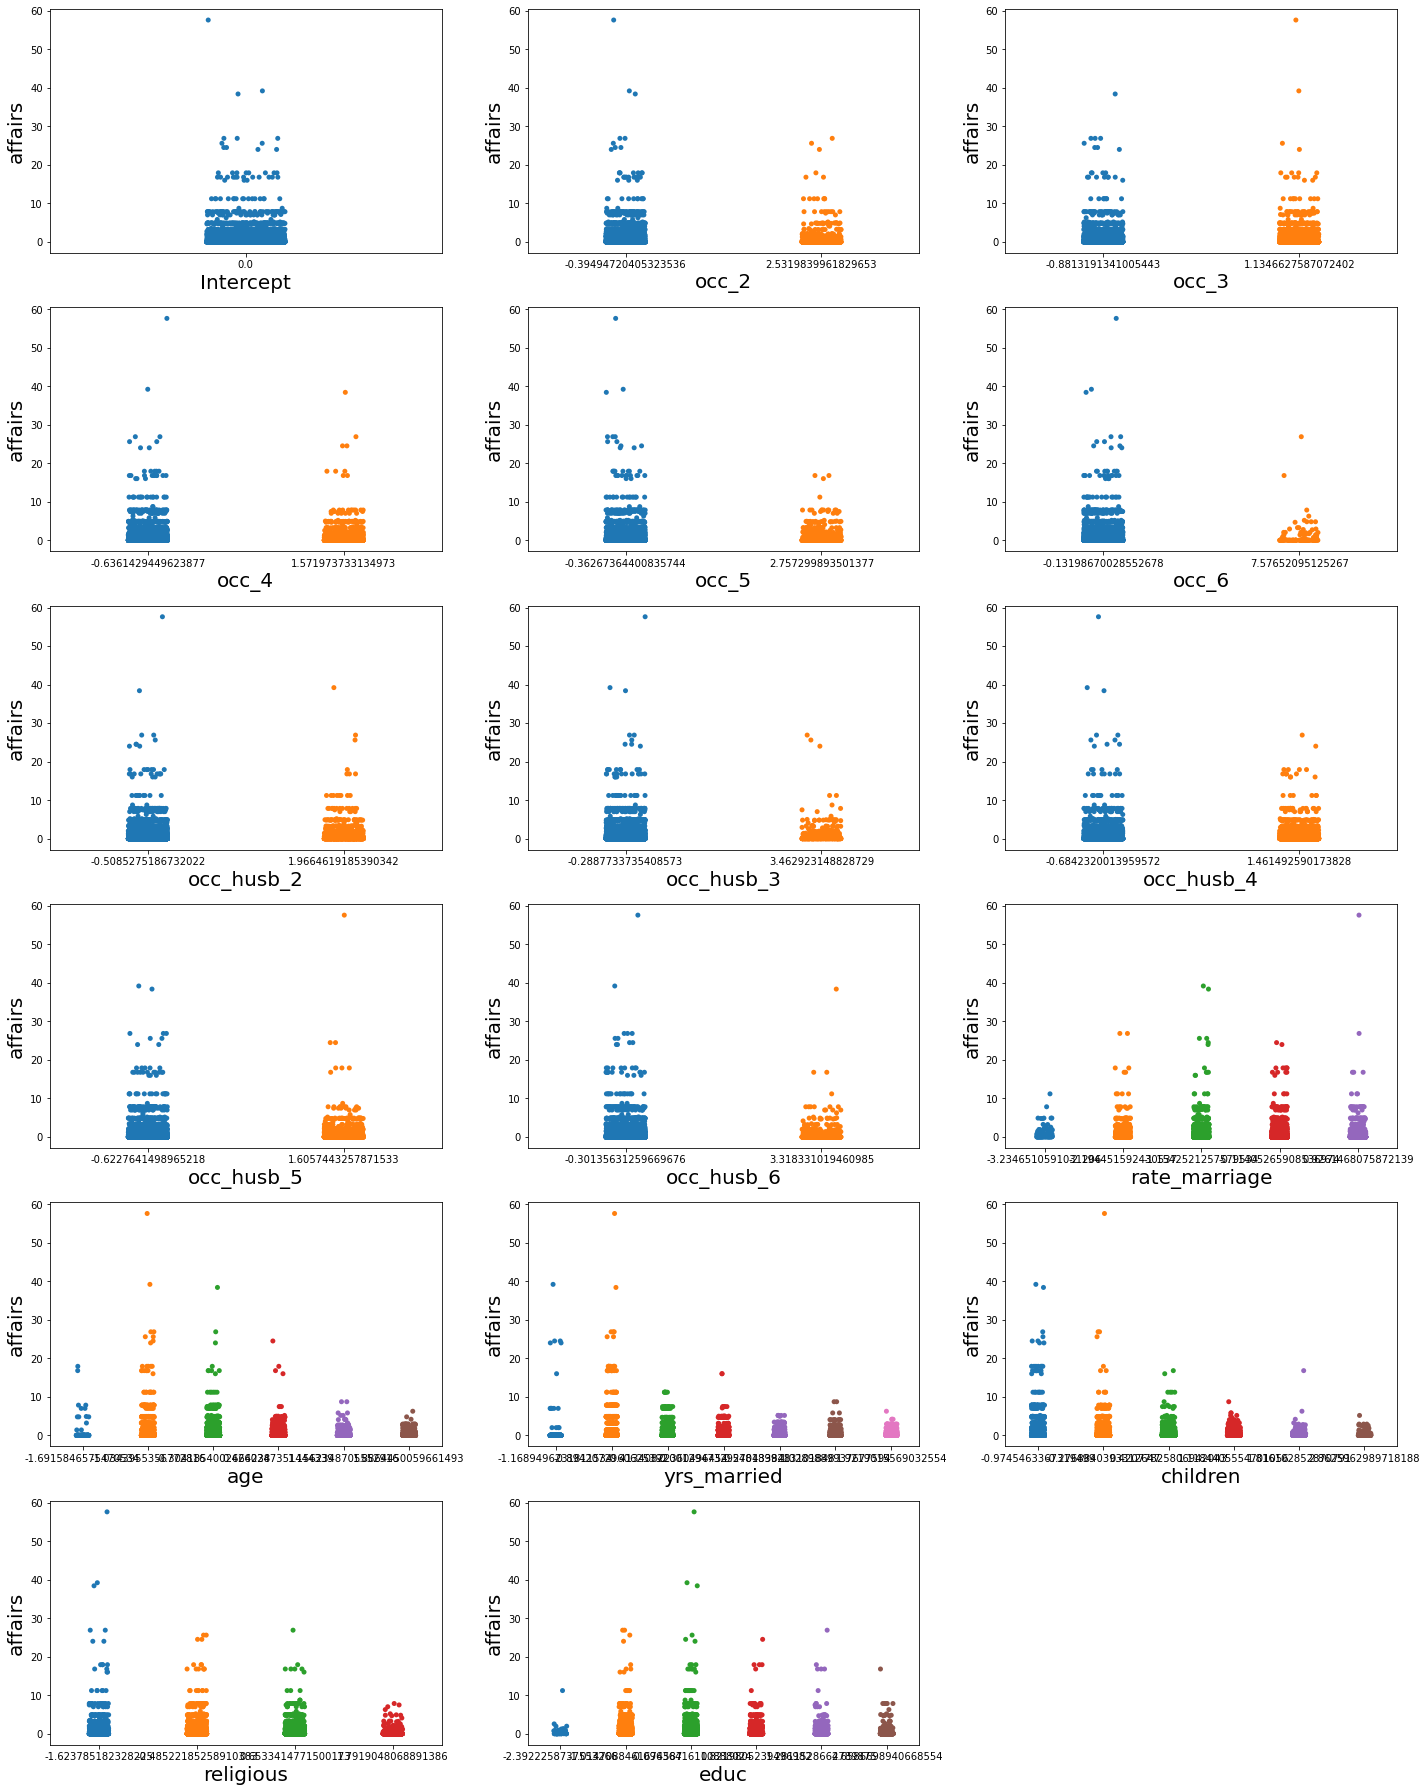

In [211]:
#outlier test
plt.figure(figsize=(20,25))
grid=1
for col in X:
    if grid<=17:
        plt.subplot(6,3,grid)
        sns.stripplot(X_scaled[:,columns.index(col)],dta.affairs)
        plt.xlabel(col,fontsize=20)
        plt.ylabel("affairs",fontsize=20)
        grid+=1
plt.tight_layout()


Determining Variance Inflation factor

In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 


In [214]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

C:\Users\AvnishYadav\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


In [216]:
required_col=vif[vif['vif']<5]

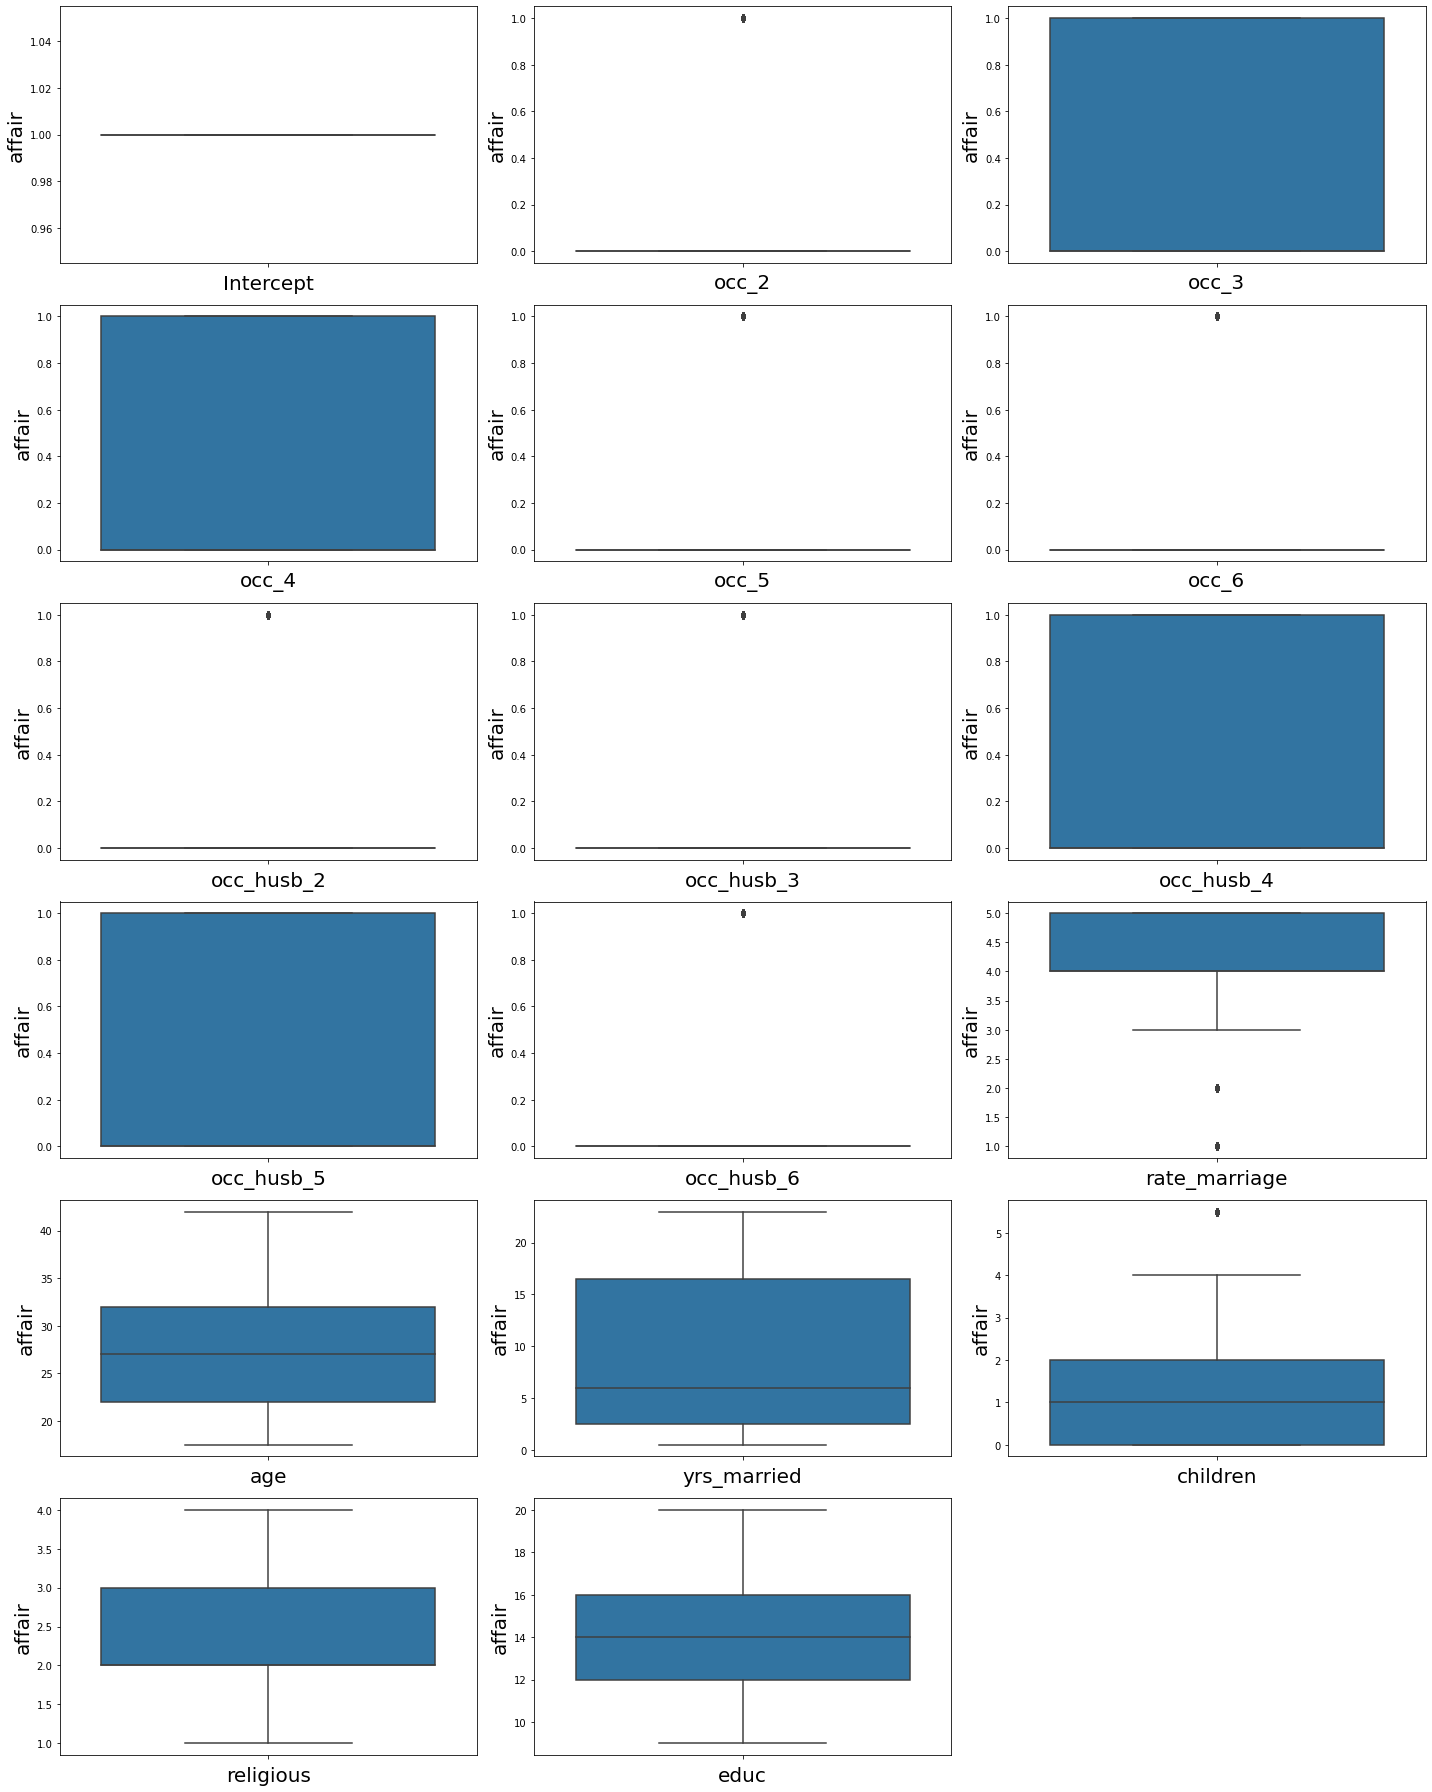

In [150]:
#outlier test
plt.figure(figsize=(20,25))
grid=1
for col in X:
    if grid<=17:
        plt.subplot(6,3,grid)
        sns.boxplot(X[col],orient="vertical")
        plt.xlabel(col,fontsize=20)
        plt.ylabel("affair",fontsize=20)
        grid+=1
plt.tight_layout()


In [157]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [159]:
X['Intercept'].value_counts()

1.0    6366
Name: Intercept, dtype: int64

In [162]:
X_selected_feature=X_scaled[:,1:]

In [163]:
X.shape

(6366, 17)

In [164]:
X_selected_feature.shape

(6366, 16)

In [258]:
from sklearn.linear_model import LogisticRegression

In [259]:
lr_clf=LogisticRegression()


In [260]:
lr_clf.fit(X_selected_feature,y)

LogisticRegression()

In [261]:
from sklearn.metrics import confusion_matrix

In [262]:
yhat=lr_clf.predict(X_selected_feature)

In [263]:
from sklearn.metrics import plot_confusion_matrix

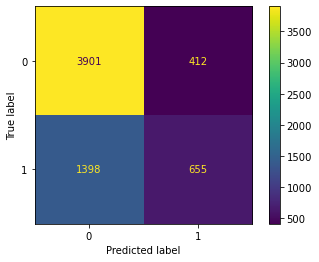

In [264]:
plot_confusion_matrix(lr_clf,X_selected_feature,y)

In [265]:
from sklearn.metrics import f1_score,precision_recall_curve

In [266]:
f1_score(y,yhat)

0.41987179487179493

In [267]:
score=lr_clf.decision_function(X_selected_feature)

In [268]:
precision, recall, thresholds=precision_recall_curve(y,score)

In [272]:
selected_thrsold=np.argmax(recall<0.5)

In [273]:
thresholds[selected_thrsold]

-0.43857644407578045

In [274]:
precision[selected_thrsold]

0.5553745928338762

In [275]:
recall[selected_thrsold]

0.49829517778860205

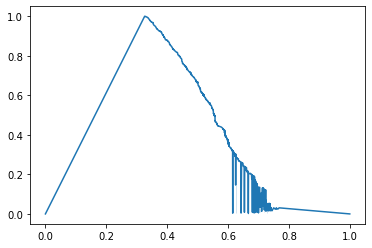

In [269]:
sns.lineplot(precision,recall)


## comparing Affair data with non affair data to find out some pattern

In [102]:
dta_eda=dta

In [103]:
affair_data=dta_eda[dta_eda['affair']==1]

In [104]:
affair_data.shape

(2053, 10)

In [105]:
no_affair_data=dta_eda[dta_eda['affair']==0]

In [106]:
no_affair_data.shape

(4313, 10)

In [107]:
affair_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [108]:
no_affair_data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0,0


In [109]:
affair_data.groupby(by=['rate_marriage'],axis=0).count()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,74,74,74,74,74,74,74,74,74
2.0,221,221,221,221,221,221,221,221,221
3.0,547,547,547,547,547,547,547,547,547
4.0,724,724,724,724,724,724,724,724,724
5.0,487,487,487,487,487,487,487,487,487


In [110]:
affair_data['rate_marriage'].value_counts()

4.0    724
3.0    547
5.0    487
2.0    221
1.0     74
Name: rate_marriage, dtype: int64

In [111]:
no_affair_data['rate_marriage'].value_counts()

5.0    2197
4.0    1518
3.0     446
2.0     127
1.0      25
Name: rate_marriage, dtype: int64

In [114]:
import seaborn as sns

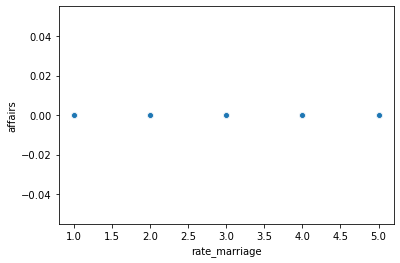

In [115]:
sns.scatterplot(no_affair_data['rate_marriage'],no_affair_data['affairs']*100)

Text(0.5, 0, 'Spend time in minute on affair')

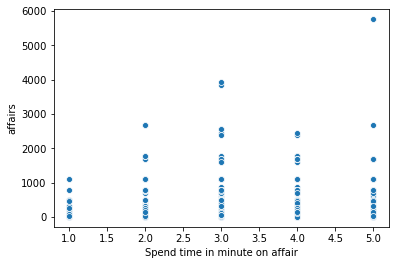

In [116]:
sns.scatterplot(affair_data['rate_marriage'],affair_data['affairs']*100)
plt.xlabel('Spend time in minute on affair')

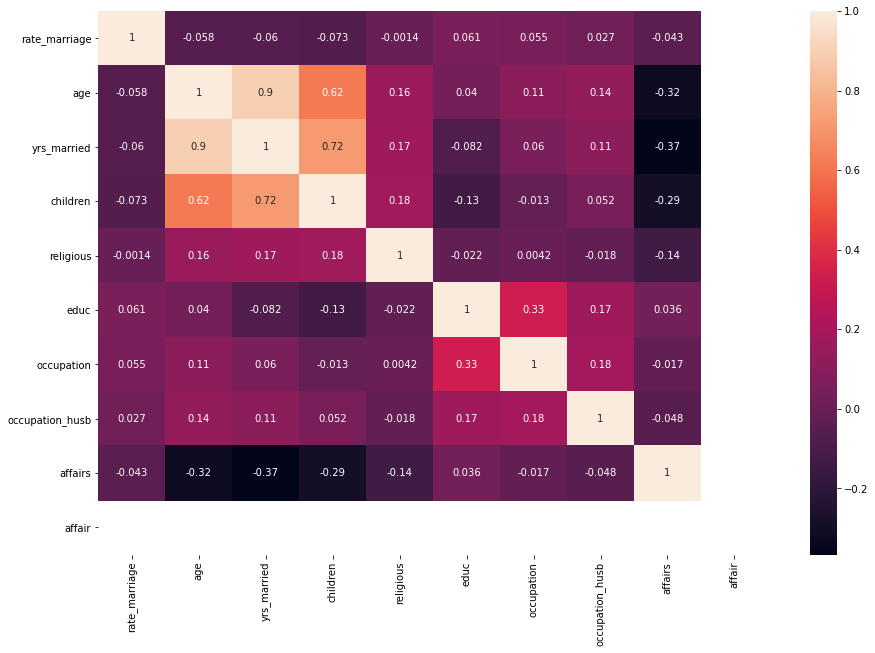

In [117]:
plt.figure(figsize=(15,10))
sns.heatmap(affair_data.corr(),annot=True)
plt.show()

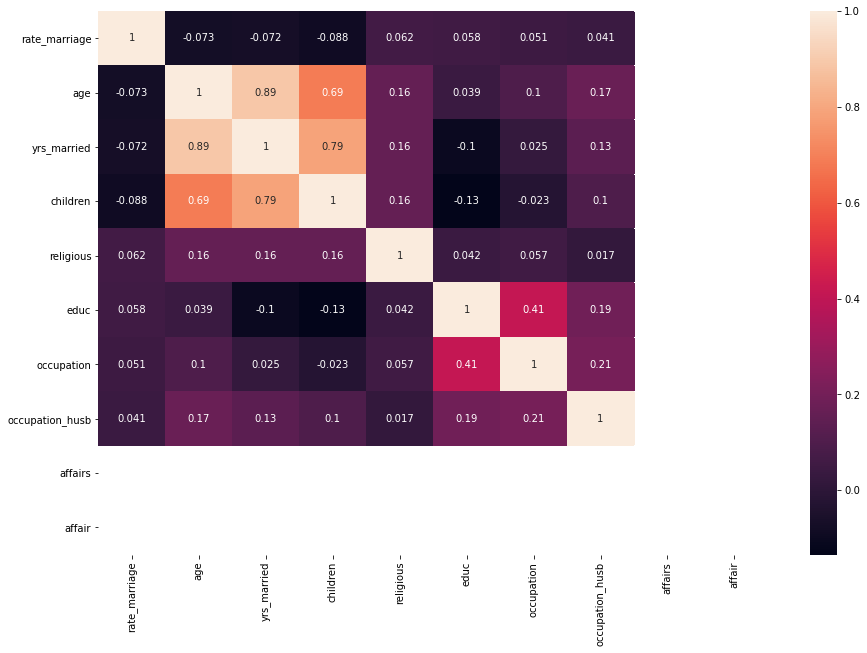

In [118]:
plt.figure(figsize=(15,10))
sns.heatmap(no_affair_data.corr(),annot=True)
plt.show()

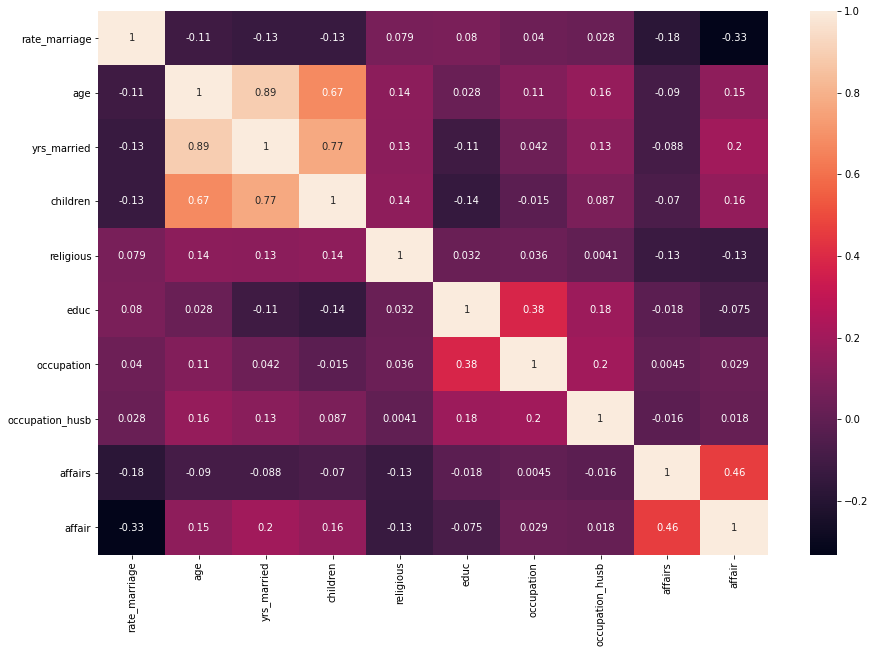

In [119]:
plt.figure(figsize=(15,10))
sns.heatmap(dta.corr(),annot=True)
plt.show()

There is no linear relation ship between data and target feature 

In [120]:
#Logistic regression will not perform well on this dataset

#### Preparing data for machine learning algorithm

In [121]:
X.columns

Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
       'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
       'age', 'yrs_married', 'children', 'religious', 'educ'],
      dtype='object')

In [122]:
X['Intercept'].value_counts()

1.0    6366
Name: Intercept, dtype: int64

In [123]:
#Data Cleaning

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [125]:
#we can drop this column as It has constant value 
X=X.drop(columns=['Intercept'],axis=1)

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
pipe_line=Pipeline([
    ('poly',PolynomialFeatures(degree=1)),
    ('scale',StandardScaler())
])

In [128]:
X_transform=pipe_line.fit_transform(X)

In [129]:
# splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform,y,test_size=0.2,random_state=42)

# Model Training

In [130]:
from sklearn.linear_model import LogisticRegression

In [131]:
logistic_regression_clf=LogisticRegression()

In [132]:
y_train,y_test=np.array(y_train).ravel(),np.array(y_test).ravel()

In [133]:
logistic_regression_clf.fit(X_train,y_train)

LogisticRegression()

## Performance measure

In [134]:
from sklearn.metrics import plot_confusion_matrix

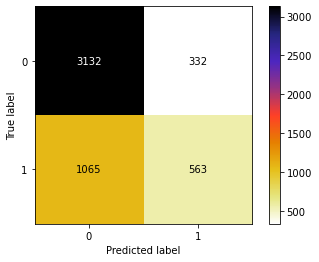

In [142]:
plot_confusion_matrix(logistic_regression_clf,X_train,y_train,cmap=plt.get_cmap(plt.colormaps()[np.random.randint(0,len(plt.colormaps())-1)]))

## Measuring Accuracy using cross-Validation

In [143]:
from sklearn.model_selection import StratifiedKFold

In [144]:
from sklearn.base import clone

In [145]:
skfolds=StratifiedKFold(n_splits=3)

In [146]:
list(skfolds.split(X_train,y_train))

[(array([1689, 1690, 1691, ..., 5089, 5090, 5091]),
  array([   0,    1,    2, ..., 1704, 1706, 1707])),
 (array([   0,    1,    2, ..., 5089, 5090, 5091]),
  array([1689, 1690, 1691, ..., 3422, 3423, 3424])),
 (array([   0,    1,    2, ..., 3422, 3423, 3424]),
  array([3349, 3353, 3356, ..., 5089, 5090, 5091]))]

In [147]:

for train_index,test_index in skfolds.split(X_train,y_train):
    clone_clf=clone(LogisticRegression())
    X_train_folds=X_train[train_index]
    y_train_folds=y_train[train_index]
    X_test_folds=X_train[test_index]
    y_test_folds=y_train[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_folds)
    n_correct=sum(y_pred==y_test_folds)
    print("Accuracy-->",n_correct/len(y_pred))
    

Accuracy--> 0.7332155477031802
Accuracy--> 0.7147908073070124
Accuracy--> 0.7212728344136712


Let's use cross val score method to evaluate Logistic regression classifier model

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
cross_val_score(LogisticRegression(),X_train,y_train,cv=3)

array([0.73321555, 0.71479081, 0.72127283])

We have obtain around 72% of accuracy

This looks amazing doesn't it? well before you get too exicted, let's look at a very dump classifier that just classifier every single record to non affair 

In [150]:
from sklearn.base import BaseEstimator

In [151]:
class NonAffairClassifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=np.int)

Can you guess this model accuracy? Let's find out:

In [152]:
non_affair_clf=NonAffairClassifier()

In [153]:
cross_val_score(non_affair_clf,X_train,y_train,cv=3,scoring="accuracy")

array([0.67550059, 0.67413082, 0.6912198 ])

!ohh it is also quite good. It is because we have non affair record round 67% in our dataset.

A much better way to evaluate the performance of a classifier is to look at the confusion matrix

In [154]:
from sklearn.model_selection import cross_val_predict

In [155]:
y_train_pred=cross_val_predict(LogisticRegression(),X_train,y_train,cv=3)

Just like cross_val_score() function, cross_val_predict() performs K-fold cross-validation,but instead of returing the evaluation scores, it returns the prediction made on on each test fold. This mean that we got a clean prediction for each instance in training set ("clean" meaning that the prediction is made by a model that never saw the data during training).

Now we are ready to get confusion matrix using confusion matrix function

In [156]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

In [157]:
confusion_matrix(y_train,y_train_pred)

array([[3127,  337],
       [1073,  555]], dtype=int64)

Each row in matrix represent actual class
Each column represent predicted class

Actual data

first row Non affair

second row affair

predicted data

first column Non affair

second column affair

In [158]:
def getCmapString():
    colors=plt.colormaps()
    l=len(colors)-1
    index=np.random.randint(0,l)
    return colors[index]

In [159]:
lr_clf=LogisticRegression()
lr_clf.fit(X_train,y_train)

LogisticRegression()

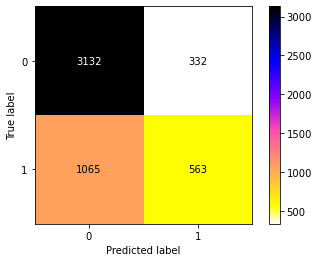

In [161]:
plot_confusion_matrix(lr_clf,X_train,y_train,cmap=plt.get_cmap(getCmapString()))

### Precision and [Recall (TPR, Sensitivity)]

TP= 3132, TN=563

FP=332, FN=1065


A perfect classifier only have true +ve and true -ve 

Let's calculate precision

In [162]:
#precision: instances classfied as +ve by model how 
#many are actually +ve

#total_postive_prediction by model=TP+FP
#actual +ve are=TP

def getPrecisionScore(TP,FP):
    precision=TP/(TP+FP)
    return precision


In [163]:
TP= 3132
TN=563
FP=332
FN=1065

In [164]:
print("precision score:",getPrecisionScore(TP,FP))

precision score: 0.9041570438799076


A trival way to have perfect precision is to make one single +ve prediction and ensure it is correct (precison=1/1=100%).

This would not be very useful since the classifier would ignore all but one +ve instance. So precision is typically used along with another metric named recall, also called sensitivity or true +ve rate (TPR)

TPR: from all +ve instances how many instances our model indentified correctly.

ratio of +ve instances that are correctly classifer by classifie


All +ve instance = TP+FN

Recall or Sensitivity or TPR=TP/(TP+FN)


In [165]:
def getRecallScore(TP,FN):
    recall=TP/(TP+FN)
    return recall

In [166]:
print("Sensitivity or recall or TPR score",getRecallScore(TP,FN))

Sensitivity or recall or TPR score 0.7462473195139385


In [167]:
from sklearn.metrics import precision_score,recall_score

In [168]:
print(f"Precision score",precision_score(y_train,y_train_pred))

Precision score 0.6221973094170403


In [169]:
print(f"Recall score",recall_score(y_train,y_train_pred))

Recall score 0.3409090909090909


Now! our model is not looks good

In [170]:
from sklearn.metrics import f1_score

In [171]:
#f1_score produces harmonic mean 
print(f"f1 score-->",f1_score(y_train,y_train_pred))

f1 score--> 0.44047619047619047


Our model is worst than random guessing.

In [ ]:
with open("LogisticRegression.sav","wb") as f:
    pickle.dump(lr_clf,f)

In [172]:
#lets's try a complex model

In [177]:
def getPolynomialDegree(X,y,model,start=1,degree=1):
    f1_scores=[]
    precision=[]
    recall=[]
    for i in range(start,degree):
        #pipe line creation
        pipe_line=Pipeline([
                ('poly',PolynomialFeatures(degree=i)),
                ('scale',StandardScaler()),
                ])
        #model creation
        clf=clone(model(max_iter=1000000))
        
        #Apply transformation on input feature
        X_transform=pipe_line.fit_transform(X)
        
        #train test split
        X_train,X_test,y_train,y_test=train_test_split(X_transform,y,test_size=0.2,random_state=42)
        #print(X_train.shape,y_train.shape)
        
        #flatten target column
        y_train=np.array(y_train).ravel()
        y_test=np.array(y_test).ravel()
        
        #training model
        clf.fit(X_train,y_train)
        yhat=clf.predict(X_test)
        
        #calculating score
        precision.append(precision_score(y_test,yhat))
        recall.append(recall_score(y_test,yhat))
        f1_scores.append(f1_score(y_test,yhat))
        print(precision,recall,f1_scores)
    return {'precision':precision,'recall':recall,'f1_score':f1_scores,'model':clf}

In [178]:
result=getPolynomialDegree(X,y,LogisticRegression,3,4)

[0.5981308411214953] [0.45176470588235296] [0.514745308310992]


In [182]:
with open("LogisticRegressionPoly3degree.sav","wb") as f:
    pickle.dump(result['model'],f)

In [181]:
result['model'].classes_

array([0, 1])

In [183]:
# on polynomial degree 3 we got 51% accuracy which is just best model from random guessing

In [197]:
def SGD_CLF(X,y,model,start=1,degree=1):
    f1_scores=[]
    precision=[]
    recall=[]
    for i in range(start,degree):
        #pipe line creation
        if i>0:
            pipe_line=Pipeline([
                ('poly',PolynomialFeatures(degree=i)),
                ('scale',StandardScaler()),
                ])
        else:
            pipe_line=Pipeline([('scale',StandardScaler()),])
        #model creation
        clf=clone(model())
        
        #Apply transformation on input feature
        X_transform=pipe_line.fit_transform(X)
        
        #train test split
        X_train,X_test,y_train,y_test=train_test_split(X_transform,y,test_size=0.2,random_state=42)
        #print(X_train.shape,y_train.shape)
        
        #flatten target column
        y_train=np.array(y_train).ravel()
        y_test=np.array(y_test).ravel()
        
        #training model
        clf.fit(X_train,y_train)
        yhat=clf.predict(X_test)
        
        #calculating score
        precision.append(precision_score(y_test,yhat))
        recall.append(recall_score(y_test,yhat))
        f1_scores.append(f1_score(y_test,yhat))
        print(precision,recall,f1_scores)
    return {'precision':precision,'recall':recall,'f1_score':f1_scores,'model':clf}

In [198]:
from sklearn.linear_model import SGDClassifier

In [199]:
sgd_clf=SGD_CLF(X,y,SGDClassifier,0,6)

[0.5657894736842105] [0.3035294117647059] [0.39509954058192953]
[0.5657894736842105, 0.6153846153846154] [0.3035294117647059, 0.30117647058823527] [0.39509954058192953, 0.40442338072669826]
[0.5657894736842105, 0.6153846153846154, 0.4763092269326683] [0.3035294117647059, 0.30117647058823527, 0.44941176470588234] [0.39509954058192953, 0.40442338072669826, 0.4624697336561743]
[0.5657894736842105, 0.6153846153846154, 0.4763092269326683, 0.48909657320872274] [0.3035294117647059, 0.30117647058823527, 0.44941176470588234, 0.36941176470588233] [0.39509954058192953, 0.40442338072669826, 0.4624697336561743, 0.42091152815013405]
[0.5657894736842105, 0.6153846153846154, 0.4763092269326683, 0.48909657320872274, 0.42488262910798125] [0.3035294117647059, 0.30117647058823527, 0.44941176470588234, 0.36941176470588233, 0.4258823529411765] [0.39509954058192953, 0.40442338072669826, 0.4624697336561743, 0.42091152815013405, 0.42538190364277323]
[0.5657894736842105, 0.6153846153846154, 0.4763092269326683, 

In [200]:
sgd_clf['f1_score']

[0.39509954058192953,
 0.40442338072669826,
 0.4624697336561743,
 0.42091152815013405,
 0.42538190364277323,
 0.418546365914787]

In [ ]:
SGDClassifier()

In [79]:
# data is not seperable linearly hence procedding with random forest

In [201]:
 X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
random_forest_clf=RandomForestClassifier()

In [204]:
y_train=np.array(y_train).ravel()

In [205]:
yhat=cross_val_predict(random_forest_clf,X_train,y_train)

In [206]:
print("precision",precision_score(y_train,yhat))

precision 0.4945054945054945


In [207]:
print("recall",recall_score(y_train,yhat))

recall 0.4146191646191646


In [208]:
print("f1 score",f1_score(y_train,yhat))

f1 score 0.45105245573003677


## Let's use grid search CV to find best paramter for random forest

In [209]:
from sklearn.model_selection import GridSearchCV

In [ ]:
random_forest_clf=RandomForestClassifier()

In [215]:
"""
max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
"""
param_grid=[
    
    {'min_samples_split':[2,4,5,8,10],
    'min_samples_leaf':[2,4,5,6,7,8,10,20],
     'max_leaf_nodes':[2,5,10,17,20],
     'n_estimators':[1,20,25,40,50,70,100,150,200,250,500],
     'bootstrap':[True,False],
     
                  
    }
]

In [216]:
grid_cv_random_clf=GridSearchCV(random_forest_clf,param_grid=param_grid)

In [217]:
grid_cv_random_clf.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'max_leaf_nodes': [2, 5, 10, 17, 20],
                          'min_samples_leaf': [2, 4, 5, 6, 7, 8, 10, 20],
                          'min_samples_split': [2, 4, 5, 8, 10],
                          'n_estimators': [1, 20, 25, 40, 50, 70, 100, 150, 200,
                                           250, 500]}])

In [218]:
grid_cv_random_clf.best_params_

{'bootstrap': True,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 25}

In [219]:
grid_cv_random_clf.best_score_

0.7254521652454061

In [222]:
yhat_rnf=grid_cv_random_clf.predict(X_test)

In [223]:
f1_score(y_test,yhat_rnf)

0.47548291233283807

## Try Decision Tree as various columns are categorical

In [70]:
dta_input=dta.drop(columns=["affairs","affair"])
dta_target=dta['affair']

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test=train_test_split(dta_input,dta_target,test_size=0.2,random_state=42)

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt_clf=DecisionTreeClassifier()

In [75]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
yhat_dt=dt_clf.predict(X_test)

In [77]:
from sklearn.metrics import plot_confusion_matrix,confusion_matrix,f1_score,precision_score,recall_score

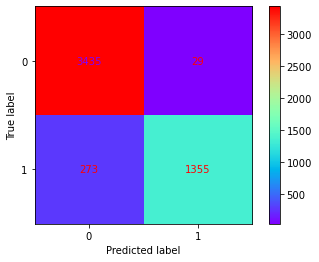

In [78]:
plot_confusion_matrix(dt_clf,X_train,y_train,cmap=plt.get_cmap('rainbow'))

In [79]:
f1_score(y_test,yhat_dt)

0.4665856622114216

In [80]:
f1_score(y_train,dt_clf.predict(X_train))

0.8997343957503319

In [81]:
#our decision tree got overfitted

In [82]:
dt_clf.classes_

array([0, 1])

In [83]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
X_train.shape

(5092, 8)

In [86]:
param_grid=[
    {'max_depth':[3,5,8,9,10,20,50],
    'max_leaf_nodes':[2,3,4,5,6,7,8,9,10,15,20,25,30,50],
     'max_features':[1,2,3,4,5,6,7,8],
    }
]

In [87]:
grid_cv=GridSearchCV(dt_clf,param_grid=param_grid)

In [88]:
grid_cv.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [3, 5, 8, 9, 10, 20, 50],
                          'max_features': [1, 2, 3, 4, 5, 6, 7, 8],
                          'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20,
                                             25, 30, 50]}])

In [89]:
grid_cv.best_params_

{'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 50}

In [90]:
yhat_cv=grid_cv.predict(X_train)

In [91]:
f1_score(y_train,yhat_cv)

0.47973224246931945

In [92]:
dt=DecisionTreeClassifier(max_depth=5,max_features=4,max_leaf_nodes=50)

In [93]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
yhat_dt=dt_clf.predict(X_test)

In [95]:
f1_score(y_test,yhat_dt)

0.4719904648390941

In [96]:
import pickle

In [99]:
with open("DecisionTree.sav","wb") as f:
    pickle.dump(dt_clf,f)

We have received higest f1 score for Logistic regression

In [225]:
with open("LogisticRegressionPoly3degree.sav","rb") as f:
    logistic_model=pickle.load(f)

In [226]:
logistic_model.classes_

array([0, 1])

In [227]:
from sklearn.metrics import precision_recall_curve

In [230]:
pipe_line=Pipeline([
                ('poly',PolynomialFeatures(degree=3)),
                ('scale',StandardScaler()),
                ])
        
X_transform=pipe_line.fit_transform(X)
        
#train test split
X_train,X_test,y_train,y_test=train_test_split(X_transform,y,test_size=0.2,random_state=42)
#print(X_train.shape,y_train.shape)

#flatten target column
y_train=np.array(y_train).ravel()
y_test=np.array(y_test).ravel()

#training model
yhat=logistic_model.predict(X_test)
        

In [233]:
pre,re,thr=precision_recall_curve(y_test,yhat)

In [232]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

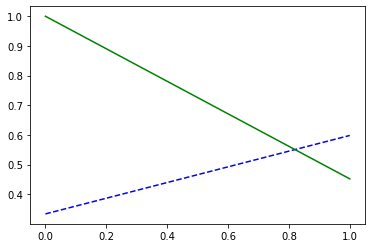

In [234]:
plot_precision_recall_vs_threshold(pre,re,thr)

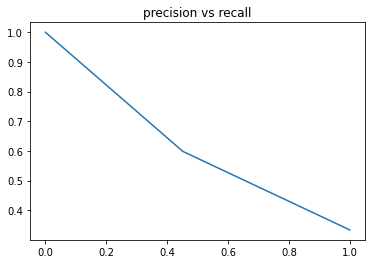

In [237]:
plt.title("precision vs recall")
plt.plot(re,pre)

In [238]:
yhat_train=logistic_model.predict(X_train)

In [261]:
pre,re,thr=precision_recall_curve(y_train,yhat_train,)

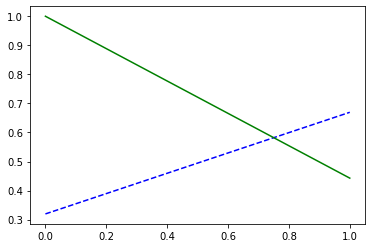

In [240]:
plot_precision_recall_vs_threshold(pre,re,thr)

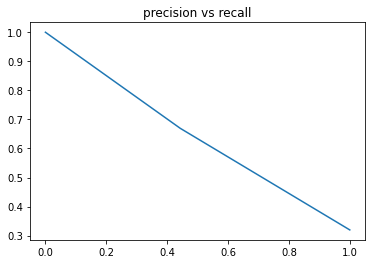

In [241]:
plt.title("precision vs recall")
plt.plot(re,pre)

In [242]:
from sklearn.metrics import roc_curve

In [243]:
fpr,tpr,threshold=roc_curve(y_test,yhat)

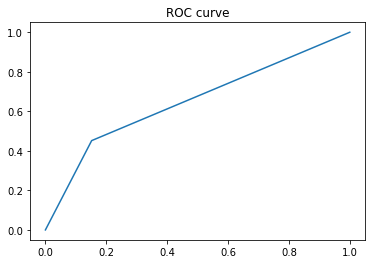

In [248]:
plt.title("ROC curve")
plt.plot(fpr,tpr)
plt.show()

In [245]:
from sklearn.metrics import roc_auc_score

In [251]:
print("Testing--->Area under the curve",roc_auc_score(y_test,yhat))

Testing--->Area under the curve 0.6499106214924132


In [250]:
print("Training--->Area under the curve",roc_auc_score(y_train,yhat_train))

Area under the curve 0.6700516651440439


In [252]:
from sklearn.metrics import plot_confusion_matrix

In [254]:
def getCmapString():
    colors=plt.colormaps()
    l=len(colors)-1
    index=np.random.randint(0,l)
    return colors[index]

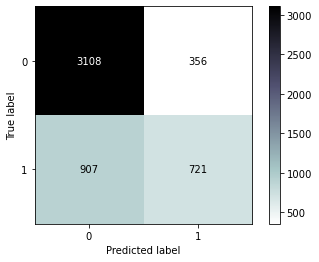

In [258]:
plot_confusion_matrix(logistic_model,X_train,y_train,cmap=plt.get_cmap(getCmapString()))

In [263]:
f1_score(y_test,yhat)

0.514745308310992

In [264]:
precision_score(y_test,yhat)

0.5981308411214953

In [265]:
recall_score(y_test,yhat)

0.45176470588235296